## Contexto

A exploração espacial está sendo fortemente retomada com, principalmente, o uso de rovers, drones e sondas espaciais. Esses dispositivos têm conseguido adquirir uma grande quantidade de dados por meio dos mais diversificados sensores. Podemos usar como exemplo o Rover Perseverance, que chegou em Marte no último dia 18 de Fevereiro, e tem conseguido adquirir muitas imagens e sons, além de conseguir realizar medições de temperatura, velocidade do vento, pressão, umidade relativa, radiação, partículas de poeira, composição elementar dos materiais da superfície e detecção de compostos orgânicos. Com essa grande quantidade de dados, podemos pensar em utilizar e desenvolver sistemas de Inteligência Artificial que possam investigar, filtrar, separar e encontrar possíveis correlações relevantes entre tudo que pode ser medido.

## Objetivo

Vocês deverão fazer o processamento de imagem para encontrar pedras e o rover (robô) em uma imagem aérea (obtidas pelo drone). 
Depois, a partir da imagem, vocês deverão utilizar técnicas de busca para encontrar o melhor caminho para o rover: de seu ponto inicial até um ponto objetivo.

## Importando Bibliotecas e Instalando Dependencias

In [ ]:
!pip install pathfinding

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder
from pathfinding.core.diagonal_movement import DiagonalMovement

Importando imagens e criando conversões para RGB e Cinza

In [ ]:
#Lendo Imagem
drone = cv2.imread('robozinho.JPG')
#Criando RGB
droneRGB = cv2.cvtColor(drone, cv2.COLOR_BGR2RGB)
#Criando e salvando Cinza
cinza = cv2.cvtColor(drone, cv2.COLOR_BGR2GRAY)
cv2.imwrite('cinza.JPG',cinza)
cinza = cv2.imread('cinza.JPG')

## Verificando imagens criadas

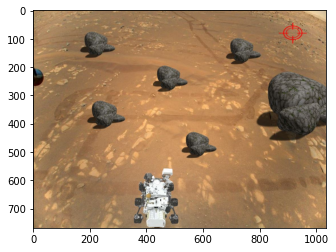

In [ ]:
plt.imshow(droneRGB)

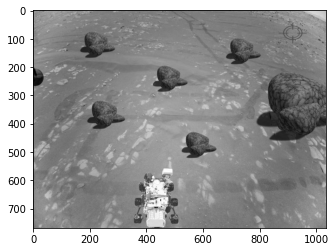

In [ ]:
plt.imshow(cinza)

## Testes de filtros

**SOBEL**

Verificamos que o filtro sobel não consegue detectar muito bem as linhas de contorno das pedras, então não sera usado no programa.

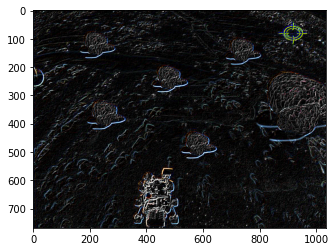

In [ ]:
sobelX = cv2.Sobel(drone, -1, 1, 0)
sobelY = cv2.Sobel(drone, -1, 0, 1)

sobelFinal = cv2.bitwise_or(sobelX, sobelY)

cv2.waitKey(0)
plt.imshow(sobelFinal)

**LAPLACIAN**

Detecção de imagem quase nula

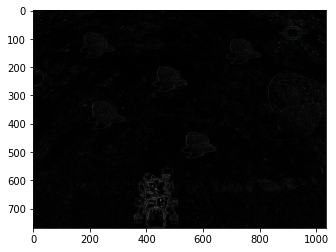

In [ ]:
laplacian = cv2.Laplacian(drone, -1)

cv2.waitKey(0)
plt.imshow(laplacian)

**CANNY**

O filtro canny apresenta melhor resultado entre os outros filtros de detecção de bordas, pode ser usado como uma segunda opção para a resolução do problema.

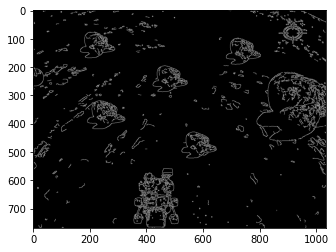

In [ ]:
edges = cv2.Canny(drone, 100, 200)

cv2.waitKey(0)
plt.imshow(edges,  cmap='gray')

**MONOCROMATICO**

Conseguimos extrair pouca informação da tela por haver uma grande variação de brilho, ja que o monocromatico trabalha apenas em duas escalas

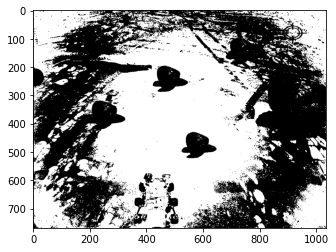

In [ ]:
(thresh, mono) = cv2.threshold(cinza, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite('mono.JPG',mono)
plt.imshow(mono)

**Detecção por Cor**

Para resolução do problema decidimos utilizar a detecção por cores ja que ha uma enorme variação das cores das rochas e a cor do solo.
Primeiro removeremos o rover da imagem para facilitar a roterização futuramente.

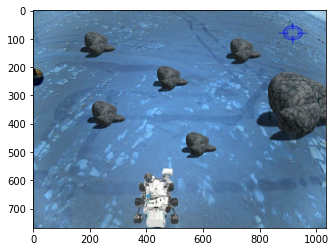

In [ ]:
plt.imshow(drone)

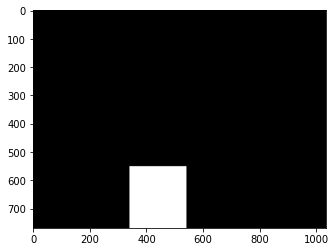

In [ ]:
#Criando uma mascara nas mesmas coordenadas do drone
mask = np.zeros(cinza.shape[:2], dtype="uint8")
cv2.rectangle(mask, (340, 550), (540, 783), 255, -1)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask)

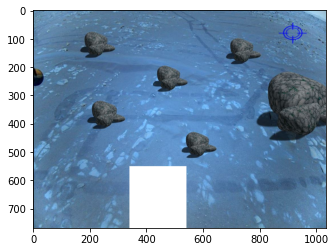

In [ ]:
#Utilizando bitwise para recortar a imagem
bitwiseOr = cv2.bitwise_or(drone, mask)
plt.imshow(bitwiseOr)

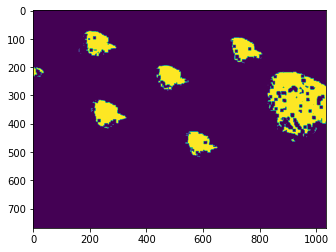

In [ ]:
#Aplicando filtro de erosão para melhorar os pontos de colisão
kernel = np.ones((10,10),int)
droneDilat = cv2.erode(bitwiseOr,kernel,iterations = 1)
#Convertendo para HSV
hsv = cv2.cvtColor(droneDilat, cv2.COLOR_BGR2HSV)
#Detectando as cores das rochas
minimo = np.array([0, 0, 0])
maximo = np.array([360, 100, 100])
mascara = cv2.inRange(hsv, minimo, maximo)

#final = cv2.bitwise_and(imgRGB, imgRGB, mask=mascara)
plt.imshow(mascara)

In [ ]:
#Diminuimos o tamanho da imagem para nao estourar o GRID
resized_image = cv2.resize(mascara, (100, 74))
#Convertendo imagem em Array
data = np.asarray(resized_image)
#Transformando em apenas 0 ou 1, caminho ou obstaculo
data = np.where(data==0, 1, data) 
data = np.where(data==255, 0, data) 

In [ ]:
#Criando grid, ponto de partida e chagada
grid = Grid(matrix = data)
inicio = grid.node(40, 70)
objetivo = grid.node(85, 5)

In [ ]:
#Habilitando e priorizando o caminho em diagonal
planejador = AStarFinder(diagonal_movement = DiagonalMovement.always)
#Aplicando funções do pathfinding para calcular o melhor caminho
caminho, _runs = planejador.find_path(inicio, objetivo, grid)

In [ ]:
#Grid visual do melhor caminho do rover
print(grid.grid_str(path=caminho, start = inicio, end = objetivo))

+----------------------------------------------------------------------------------------------------+
|                                                                                                    |
|                                                                                                    |
|                                                                                                    |
|                                                                                                    |
|                                                                                                    |
|                                                                                     e              |
|                                                                                    x               |
|                  ####                                                             x                |
|                   #####                                                

In [ ]:
#Array com o caminho feito
print(caminho)

[(40, 70), (40, 69), (41, 68), (42, 67), (43, 66), (44, 65), (44, 64), (44, 63), (44, 62), (44, 61), (44, 60), (45, 59), (46, 58), (46, 57), (47, 56), (47, 55), (47, 54), (47, 53), (47, 52), (47, 51), (48, 50), (49, 49), (50, 48), (51, 47), (51, 46), (51, 45), (51, 44), (51, 43), (52, 42), (53, 41), (54, 40), (55, 39), (56, 38), (56, 37), (57, 36), (58, 35), (59, 34), (60, 33), (61, 32), (62, 31), (63, 30), (64, 29), (65, 28), (66, 27), (67, 26), (68, 25), (69, 24), (70, 23), (71, 22), (72, 21), (73, 20), (74, 19), (75, 18), (76, 17), (77, 16), (78, 15), (79, 14), (80, 13), (81, 12), (82, 11), (83, 10), (83, 9), (84, 8), (85, 7), (85, 6), (85, 5)]
